# Cluster Analysis of Saturn Cloud Features

##### Based on clustering datasets from NASA.

In [1]:
# Basic imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def txt_to_dataframe(file_path):
    # Initialize lists to store the data
    clusters = []
    latitudes = []
    longitudes = []
    
    # Open and read the file
    with open(file_path, 'r') as file:
        for line in file:
            # Split the line by whitespace
            parts = line.strip().split()
            
            # Extract the cluster number, latitude, and longitude
            cluster = int(parts[0])
            latitude = float(parts[1])
            longitude = float(parts[2])
            
            # Append the values to the lists
            clusters.append(cluster)
            latitudes.append(latitude)
            longitudes.append(longitude)
    
    # Create a DataFrame
    data = {
        'Cluster': clusters,
        'Latitude': latitudes,
        'Longitude': longitudes
    }
    df = pd.DataFrame(data)
    
    return df

In [3]:
file1 = '/Users/sana/Downloads/2007_310_clusterdata.txt'
file2 = '/Users/sana/Downloads/2008_108_clusterdata.txt'
file3 = '/Users/sana/Downloads/2008_128_clusterdata.txt'
file4 = '/Users/sana/Downloads/2014_259_clusterdata.txt'
DOY_310 = txt_to_dataframe(file1)
DOY_108 = txt_to_dataframe(file2)
DOY_128 = txt_to_dataframe(file3)
DOY_259 = txt_to_dataframe(file4)

In [4]:
DOY_310.head()

,Cluster,Latitude,Longitude
0,1,18.5,-158.5
1,1,18.5,-135.5
2,1,18.5,-134.5
3,1,20.5,-133.5
4,1,22.5,-154.5


In [5]:
DOY_108.head()

,Cluster,Latitude,Longitude
0,1,18.5,-147.5
1,1,18.5,-145.5
2,1,18.5,-144.5
3,1,18.5,-132.5
4,1,19.5,-166.5


In [6]:
DOY_128.head()

,Cluster,Latitude,Longitude
0,1,18.5,-120.0
1,1,18.5,-111.0
2,1,18.5,-102.0
3,1,18.5,-101.0
4,1,18.5,-100.0


In [7]:
DOY_259.head()

,Cluster,Latitude,Longitude
0,1,19.5,-140.5
1,1,19.5,-139.5
2,1,24.5,-167.5
3,1,40.5,-171.5
4,1,40.5,-164.5


### Cluster Frequency Analysis

In [8]:
# Concatenating all DataFrames
saturnClouds = pd.concat([DOY_310, DOY_108, DOY_128, DOY_259], ignore_index=True)

In [9]:
# Counting the occurrences of each cluster
cluster_frequency = saturnClouds['Cluster'].value_counts().reset_index()

# Naming columns
cluster_frequency.columns = ['Cluster', 'Frequency']

# Display the frequency of each cluster
cluster_frequency.head()

,Cluster,Frequency
0,3,27018
1,2,18589
2,6,15549
3,4,14143
4,5,5518


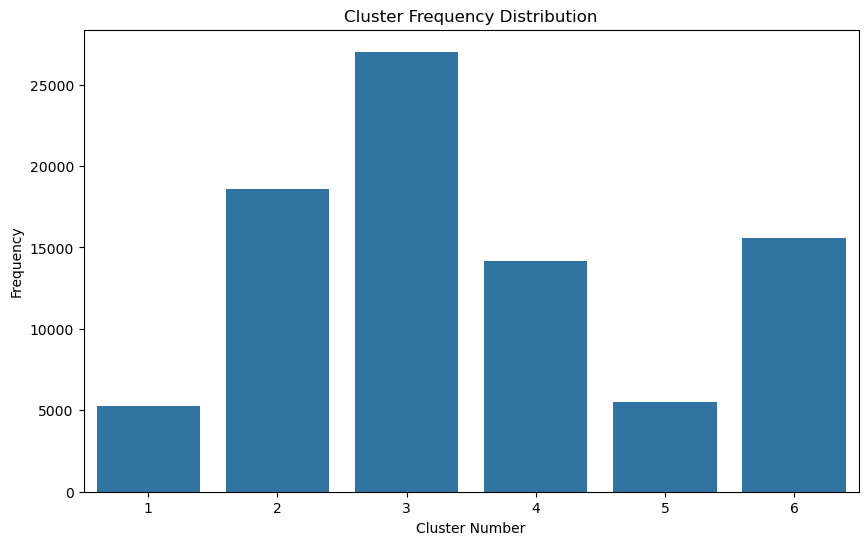

In [10]:
# bar plot
plt.figure(figsize=(10, 6))

# Plotting the frequency of each cluster
sns.barplot(x='Cluster', y='Frequency', data=cluster_frequency)

# Labels and title
plt.title('Cluster Frequency Distribution')
plt.xlabel('Cluster Number')
plt.ylabel('Frequency')

plt.show()

### Cluster Distribution by Latitude and Longitude

In [11]:
# summary statistics for Latitude and Longitude
cluster_distribution = saturnClouds.groupby('Cluster').agg({
    'Latitude': ['mean', 'std', 'min', 'max'],
    'Longitude': ['mean', 'std', 'min', 'max']
}).reset_index()

cluster_distribution.columns = ['Cluster', 'Lat_mean', 'Lat_std', 'Lat_min', 'Lat_max', 
                                'Lon_mean', 'Lon_std', 'Lon_min', 'Lon_max']

cluster_distribution.head()

,Cluster,Lat_mean,Lat_std,Lat_min,Lat_max,Lon_mean,Lon_std,Lon_min,Lon_max
0,1,35.678497,12.392137,18.5,59.5,-187.289040,104.621366,-360.0,-0.5
1,2,41.123702,11.079041,18.5,59.5,-180.383856,103.734615,-360.0,-0.5
2,3,42.219890,11.144483,18.5,59.5,-176.285976,101.594789,-360.0,-0.5
3,4,35.143357,12.542867,18.5,59.5,-183.589019,106.063398,-360.0,-0.5
4,5,35.668177,12.043603,18.5,59.5,-191.484233,104.889528,-360.0,-0.5


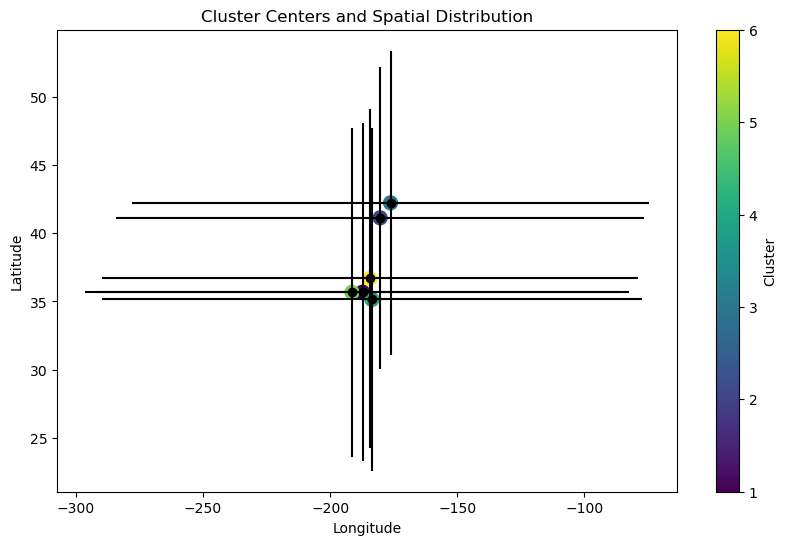

In [12]:
plt.figure(figsize=(10, 6))

# Scatter plot of the mean latitude and longitude for each cluster
plt.scatter(cluster_distribution['Lon_mean'], cluster_distribution['Lat_mean'], 
            s=100, c=cluster_distribution['Cluster'], cmap='viridis', label='Cluster Centers')

# Error bars for standard deviation) 
plt.errorbar(cluster_distribution['Lon_mean'], cluster_distribution['Lat_mean'], 
             xerr=cluster_distribution['Lon_std'], yerr=cluster_distribution['Lat_std'], fmt='o', color='black')

# Labels and title
plt.title('Cluster Centers and Spatial Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.colorbar(label='Cluster')
plt.show()


### Temporal Analysis: How Clusters Change Over Time

In [15]:
# Adding a 'Year' column to each DataFrame
DOY_310['Year'] = '2007'  
DOY_108['Year'] = '2008'  
DOY_128['Year'] = '2008'  
DOY_259['Year'] = '2014'  

# Combine all DataFrames into one
allYears = pd.concat([DOY_310, DOY_108, DOY_128, DOY_259], ignore_index=True)


In [16]:
cluster_location_over_time = allYears.groupby(['Year', 'Cluster']).agg({
    'Latitude': 'mean',
    'Longitude': 'mean'
}).reset_index()

cluster_location_over_time.head()

,Year,Cluster,Latitude,Longitude
0,2007,1,32.803797,-179.574799
1,2007,2,40.789887,-185.852858
2,2007,3,43.307461,-181.542372
3,2007,4,30.764204,-180.890562
4,2007,5,31.399911,-192.412422


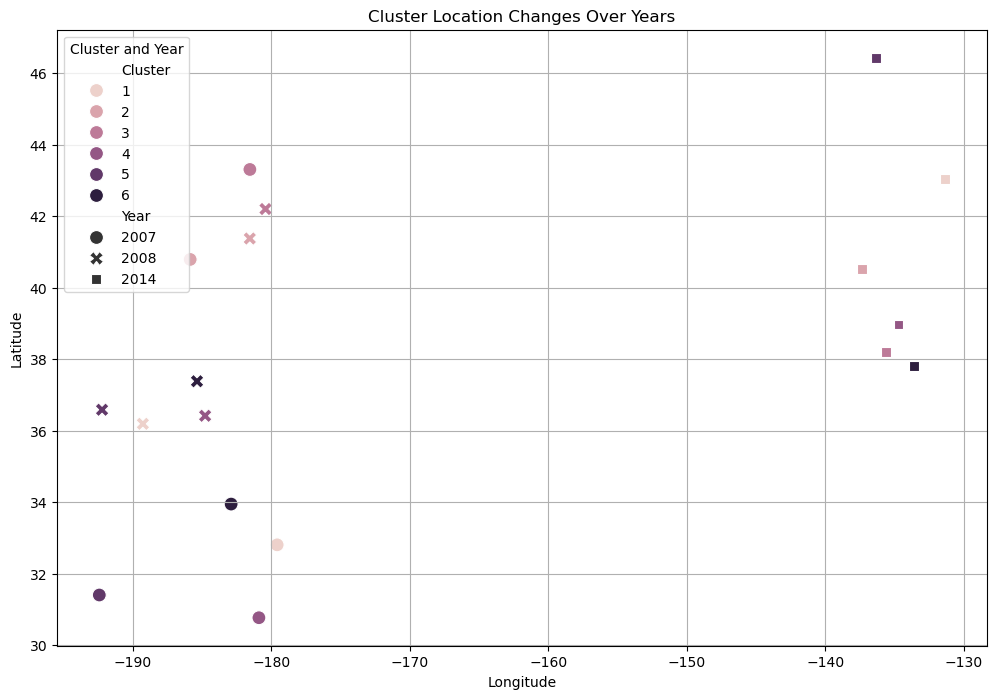

In [17]:
plt.figure(figsize=(12, 8))

# Scatter plot of cluster centers over the years
sns.scatterplot(data=cluster_location_over_time, 
                x='Longitude', 
                y='Latitude', 
                hue='Cluster', 
                style='Year', 
                s=100)

# Labels and title
plt.title('Cluster Location Changes Over Years')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(title='Cluster and Year')
plt.grid()
plt.show()


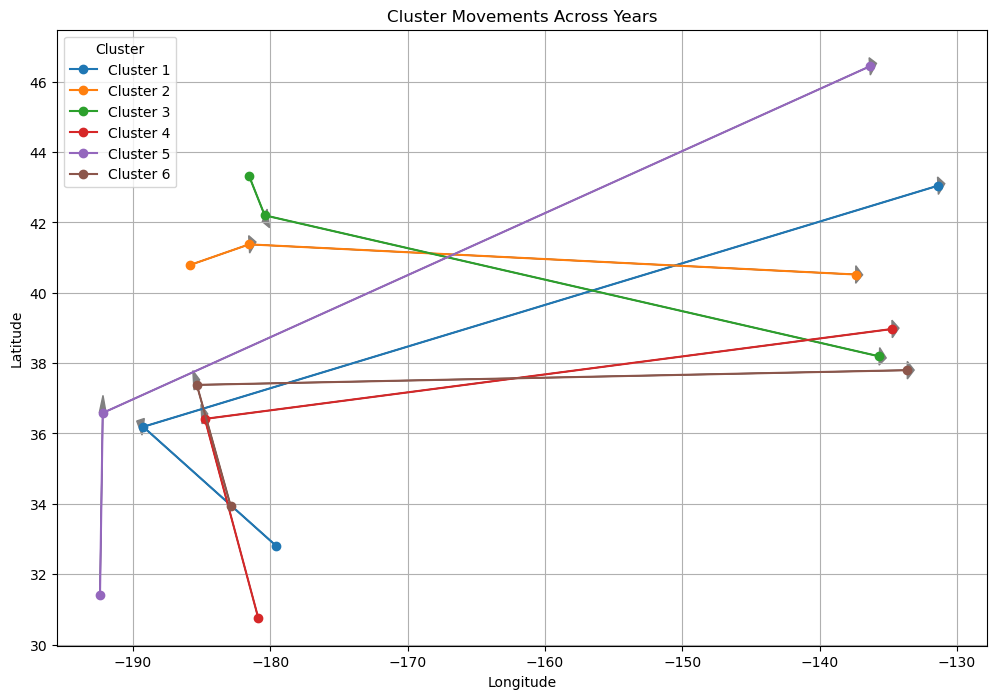

In [21]:
plt.figure(figsize=(12, 8))

uniqueClusters = cluster_location_over_time['Cluster'].unique()

# Plotting arrows for each cluster across years
for cluster in uniqueClusters:
    clusterData = cluster_location_over_time[cluster_location_over_time['Cluster'] == cluster].sort_values(by='Year')
    plt.plot(clusterData['Longitude'], clusterData['Latitude'], marker='o', label=f'Cluster {cluster}')
    
    # Arrows to indicate direction
    for i in range(len(clusterData) - 1):
        plt.arrow(clusterData['Longitude'].iloc[i], clusterData['Latitude'].iloc[i],
                  clusterData['Longitude'].iloc[i+1] - clusterData['Longitude'].iloc[i],
                  clusterData['Latitude'].iloc[i+1] - clusterData['Latitude'].iloc[i],
                  head_width=0.5, head_length=0.5, fc='gray', ec='gray')

# Labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Movements Across Years')
plt.legend(title='Cluster')
plt.grid()
plt.show()


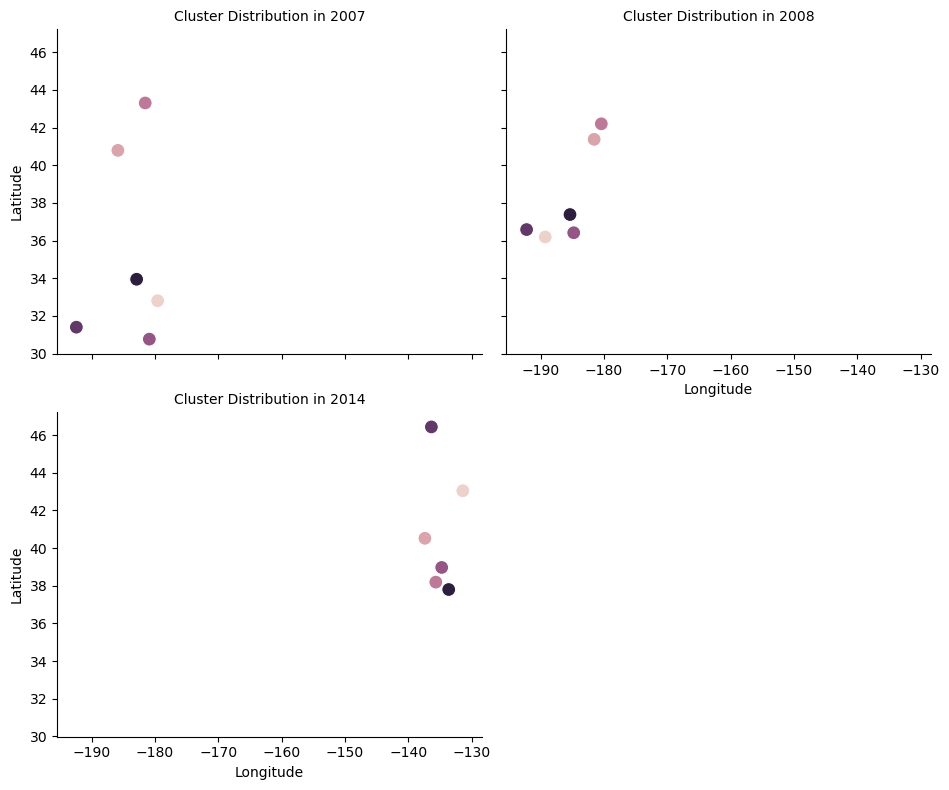

In [24]:
# FacetGrid with one scatter plot per year
g = sns.FacetGrid(cluster_location_over_time, col='Year', col_wrap=2, height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='Longitude', y='Latitude', hue='Cluster', s=100)
g.set_axis_labels("Longitude", "Latitude")
g.set_titles("Cluster Distribution in {col_name}")

plt.show()
